## Read in the Data

This exercise shows how R interfaces with other programs, particularly SQL database management. We will use the package RSQLite, which not only provides an R interface but also installs a minimal library for database access.

We will look trends in baseball team payrolls between the years 1985 and 2010. The data come from the Baseball Databank http://baseball-databank.org and is based in part on Lahman’s Baseball Database. Information on the attributes in the database can be found at http://baseball1.com/files/ database/readme58.txt. You will need to download the SQLite database file baseball.sqlite (located at https://www.dropbox.com/s/mgcahruairqmbxo/baseball.sqlite?dl=1) to your computer.

There is an R package, lahman, containing data frames with all of this data, which you can use after the homework if you’re curious. Using it in this homework will be counter-productive.

## Set Up
Using RSQLite, setup a connection to the SQLite database stored in baseball.db. Use dbListTables() to list the tables in the database.

In [1]:
library('RSQLite')

db_conn <- dbConnect(SQLite(), dbname="baseball.sqlite")
dbListTables(conn = db_conn)

[1] "AllstarFull"         "Appearances"         "AwardsManagers"     
 [4] "AwardsPlayers"       "AwardsShareManagers" "AwardsSharePlayers" 
 [7] "Batting"             "BattingPost"         "Fielding"           
[10] "FieldingOF"          "FieldingPost"        "HallOfFame"         
[13] "Managers"            "ManagersHalf"        "Master"             
[16] "Pitching"            "PitchingPost"        "Salaries"           
[19] "Schools"             "SchoolsPlayers"      "SeriesPost"         
[22] "Teams"               "TeamsFranchises"     "TeamsHalf"          
[25] "sqlite_sequence"     "xref_stats"

## Calculate the payroll
Use the table that contains salaries and compute the payroll for each team in 2010. Use dbReadTable() to grab the entirety of the table, then select the relevant subset. Which teams had the highest payrolls?

In [2]:
# Using the aggregate function
salaries <- dbReadTable(conn=db_conn, "Salaries")
salary2010 <-salaries[ salaries$yearID == 2010, ]
payroll <- aggregate(salary ~ teamID,salary2010, sum)

# Order by payroll descending
ordered <- payroll[order(-payroll$salary),]
head(ordered)

# library('ggplot2')
# # Very basic bar graph
# print("Now let's see a barplot of these salaries")
# ggplot(data=ordered[1:5,], aes(x=teamID, y=salary, label=salary)) +
#     geom_bar(stat="identity")

,teamID,salary
18,NYA,206333389
4,BOS,162447333
6,CHN,146609000
21,PHI,141928379
19,NYN,134422942
10,DET,122864928


The teams with the highest payroll are New York Yankees, Boston Redsox, New York Mets, Los Angeles Dodgers, Atlanta Braves, and Chicago Cubs

## Calculate using SQL
Repeat the previous step, but now do this using only dbGetQuery() and SQL. You should verify that your answers are identical (you can do this by eye without checking formally with code).

In [3]:
query <-"SELECT teamID, 
                SUM(Salary) as payroll 
        FROM Salaries 
        WHERE yearID = 2010
        GROUP BY teamID 
        ORDER BY payroll desc 
        LIMIT 6"
salaries <- dbGetQuery(conn=db_conn, query)
salaries

teamID,payroll
NYA,206333389
BOS,162447333
CHN,146609000
PHI,141928379
NYN,134422942
DET,122864928


In [4]:
dbListFields(conn=db_conn, "Salaries")

[1] "yearID"   "teamID"   "lgID"     "playerID" "salary"

Modify the SQL statement from part c to compute the payroll for each team for each year from 1985 to 2010.

In [5]:
query <-"SELECT teamID, yearID,
                SUM(Salary) as payroll 
        FROM Salaries 
        GROUP BY teamID, yearID 
        ORDER BY payroll desc"
salaries <- dbGetQuery(conn=db_conn, query)

library("reshape2")
dcast(salaries, yearID ~ teamID, value.var = "payroll")

yearID,ANA,ARI,ATL,BAL,BOS,CAL,CHA,CHN,CIN,⋯,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
1959,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1980,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,55000,NA
1981,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,85000,NA
1982,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,250000,NA
1983,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,450000,NA
1984,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,650000,NA
1985,NA,NA,14807000,11560712,10897560,14427894,9846178,12702917,8359917,⋯,10124966,9227500,11036583,4613000,8221714,11817083,NA,7676500,8812550,NA
1986,NA,NA,17102786,13001258,14402239,14427258,10418819,17208165,11906388,⋯,11590166,10843500,11380693,5958309,8947000,9875010,NA,6743119,12611047,NA
1987,NA,NA,16544560,13900273,10144167,12843499,10641843,14307999,9281500,⋯,11514233,7652000,11065796,2263500,7290000,11758000,NA,880000,10479501,NA
1988,NA,NA,12728174,13532075,13896092,11947388,6390000,13119198,8888409,⋯,13838000,5998500,9561002,7342450,12380000,12880000,NA,5342131,12241225,NA


## Visualization
Visualize the change in payrolls over time. To do this sensibly, one needs to adjust for inflation. The following code snippet gets price levels (CPI, consumer price index) from FRED (the Federal Reserve Economic Data service).

The below code isn't working so I'll download the CPI manually  
```R
library(fImport)

cpi <- fredSeries("CPIAUCSL",
                    from = as.Date("1985-01-01"),
                    to = as.Date("2011-01-01")
                 )

cpi <- cpi[months(as.Date(rownames(cpi))) == "January"]
cpi <- cpi / cpi[length(cpi)]
```

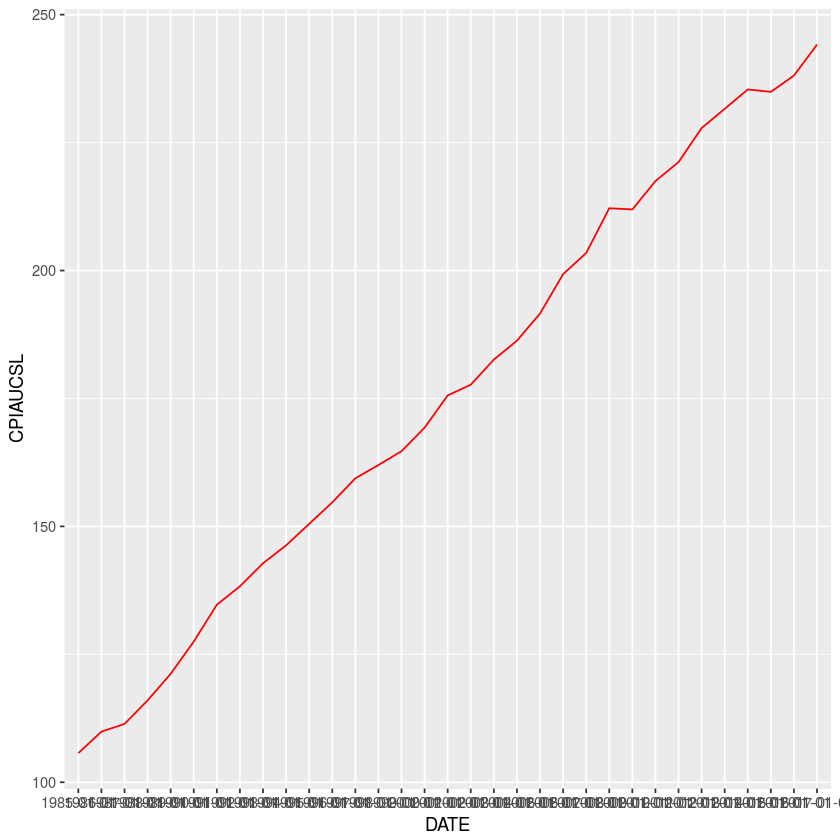

In [6]:
library(ggplot2)

# Read in the CPIAUCSL 
cpi <- read.csv('./CPIAUCSL.csv', header = TRUE, sep = ",")

# Filter to after 1985
cpi <- cpi[as.Date(cpi$DATE) >= as.Date("1985-01-01"), ]

# Filter to January
cpi <- cpi[months(as.Date(cpi$DATE)) == "January", ] 

ggplot(data=cpi, aes(x=DATE, y=CPIAUCSL, group=1)) + geom_line(color="red")

Calculate the inflation-adjusted payroll of each baseball team over time. Hint: While there are many ways of computing this, you may find the following a helpful start. 
```R
total_inflAdj <- vector("numeric",length = nrow(Salaries))
for(i in 1:nrow(Salaries))  {
      total_inflAdj[i] <- ### YOUR CODE HERE to finish this assignment statement
}
Salaries$total_inflAdj <- total_inflAdj
```

In [7]:
library(lubridate)

cpi$yearID <- year(cpi$DATE)
salaries <- merge(salaries,cpi[,c('CPIAUCSL','yearID')],by="yearID")

latest_cpi <- cpi[nrow(cpi),'CPIAUCSL']


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



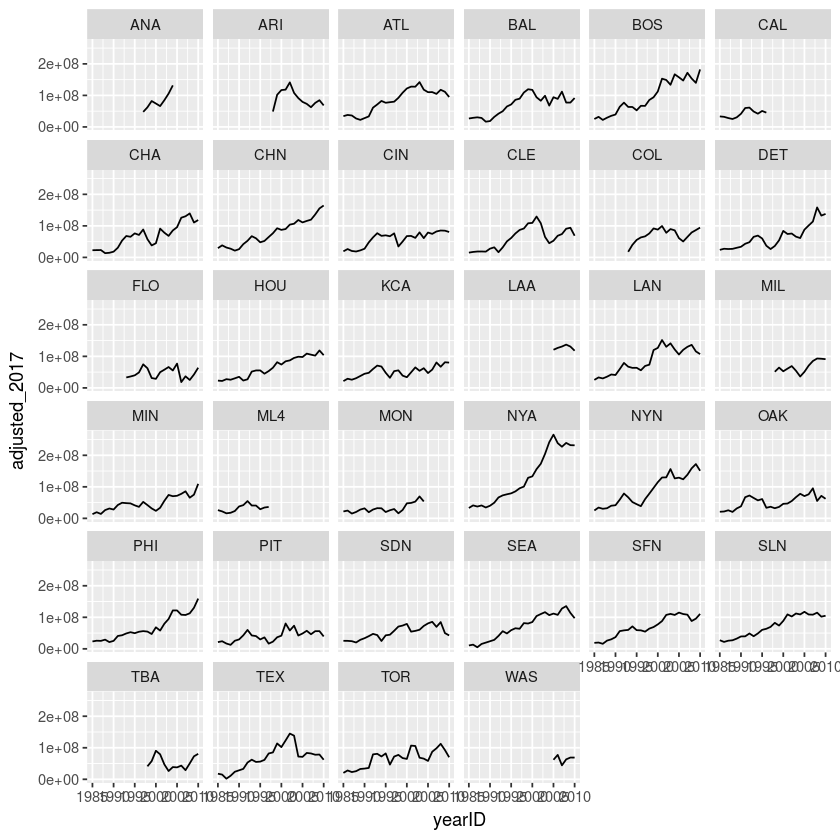

In [8]:
salaries$adjusted_2017 <- salaries$payroll*latest_cpi/salaries$CPIAUCSL
ggplot(salaries, aes(x=yearID, y=adjusted_2017)) + geom_line() + facet_wrap(~teamID)

Modify the above code to plot the logarithm of inflation-adjusted payrolls over time. I guess we're doing this to smooth outliers?

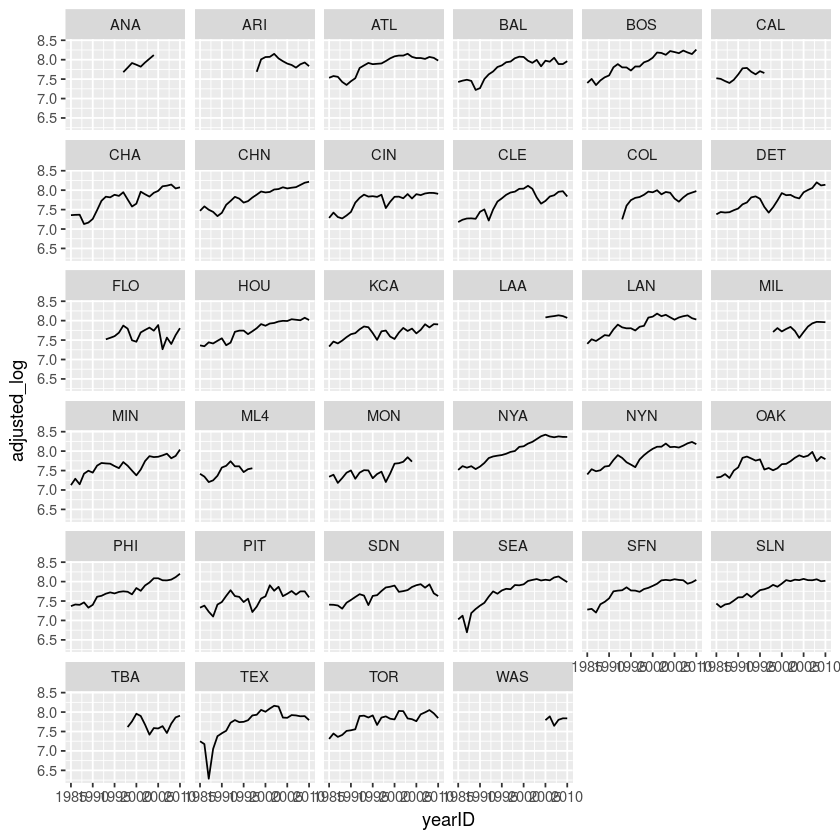

In [9]:
salaries$adjusted_log <- log10(salaries$adjusted_2017)
ggplot(salaries, aes(x=yearID, y=adjusted_log)) + geom_line() + facet_wrap(~teamID)

Have payrolls generally kept up with inflation, outpaced it, or fallen behind? Are there teams or groups of teams whose payrolls have consistently been higher than the others? 

It seems that payrolls have actually **outpaced** inflation. Almost every team sees an increasing payroll trend, even after normalizing for inflation. Given increasing trends even in the log(salary) plots, we can tell that payroll is increasing at an exponential rate.

To see how these teams compare against each other, we can plot all on the same graph:

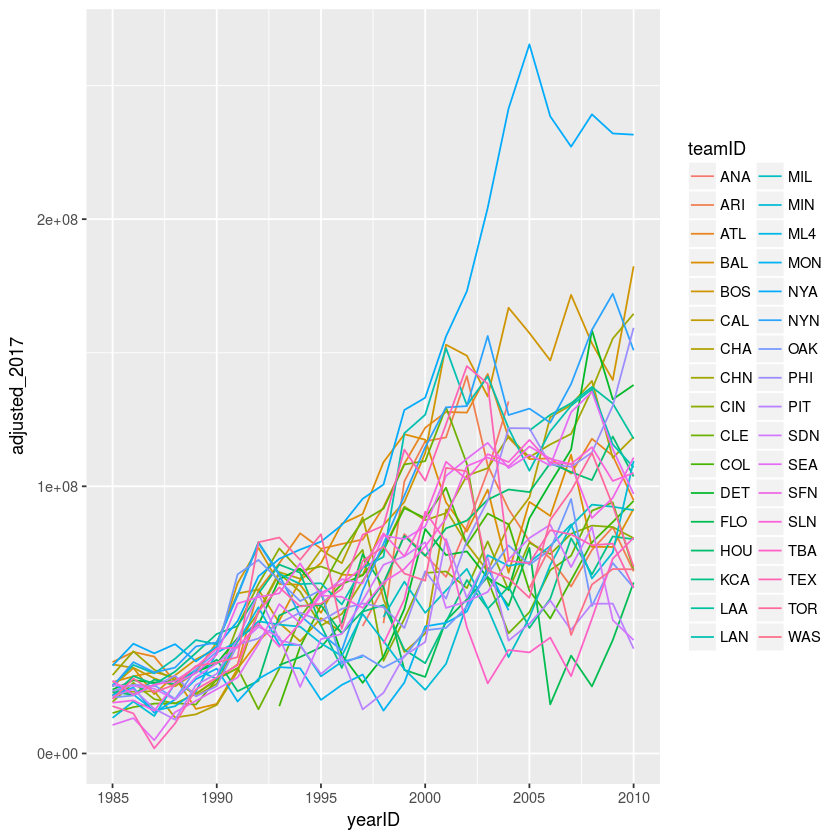

In [10]:
ggplot(salaries, aes(x=yearID, y=adjusted_2017)) + geom_line(aes(group = teamID, color= teamID))

**The Yankees (NYA) clearly outpace the rest of the Baseball Association**

## Bonus
Expand your SQL query to also retrieve the number of games played, and the number of games won, by each team each year. Create a scatter-plot of the proportion of games won against the inflation-adjusted payroll. Do you think payroll looks like a good predictor of games won? 

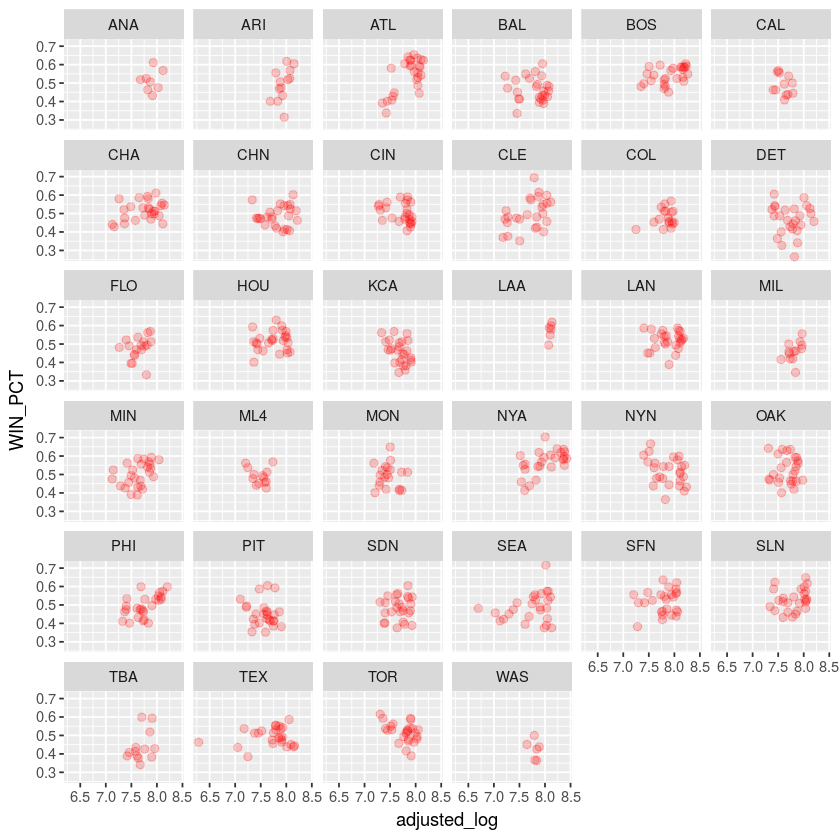

In [34]:
query <-"SELECT CAST(W AS FLOAT)/G  AS WIN_PCT,
        yearID,
        teamID
        FROM Teams 
        GROUP BY yearID, teamID"
performance <- dbGetQuery(conn=db_conn, query)
combined = merge(performance, salaries, by=c("yearID","teamID"))
ggplot(combined, aes(x=adjusted_log, y=WIN_PCT)) + geom_point(color='red', size=2, alpha=0.2) + facet_wrap(~teamID)


It seems like it does depending on the team! Some teams aren't using their payrolls wisely. At the aggregate level, it may have *some* prediction strength, but not too much. See the scatter plot below

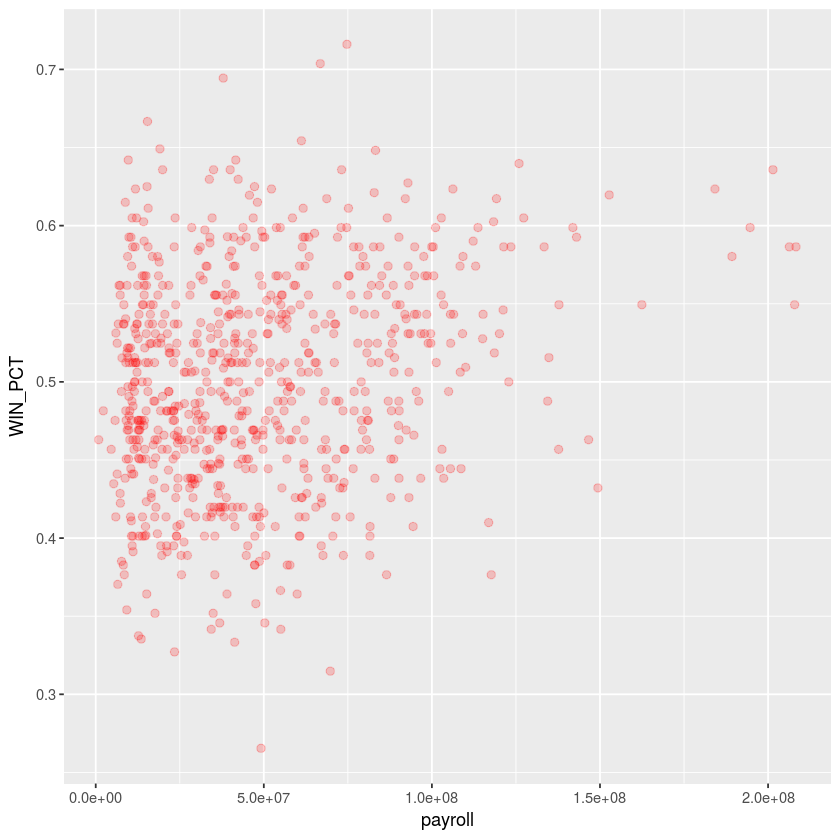

In [32]:
ggplot(combined, aes(x=payroll, y=WIN_PCT)) + geom_point(color='red', size=2, alpha=0.2)